In [1]:
include("../Sandpile.jl")
using .Sandpile
using Plots

## Functions for Implementing Sandpile Rules

In [2]:
x, y = 10, 10; # Dimensions of grid
N = 100; # Number of grains to be added
fᵪ = 4; # Critical value for sandpile model

We can choose to have a random initial set-up

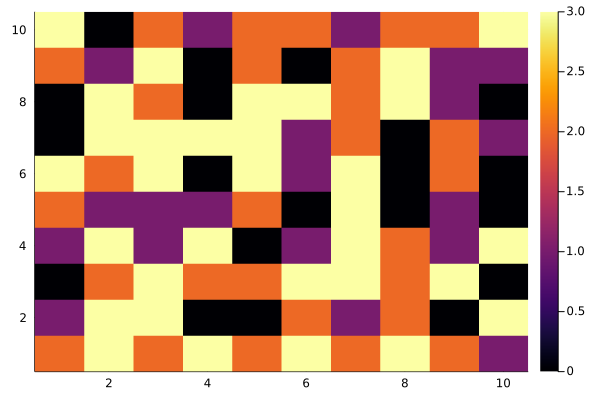

In [3]:
z = sandpile_init(x, y, "random");
heatmap(1:x, 1:y, z)

Or we can choose to initialize the grid with all 0s

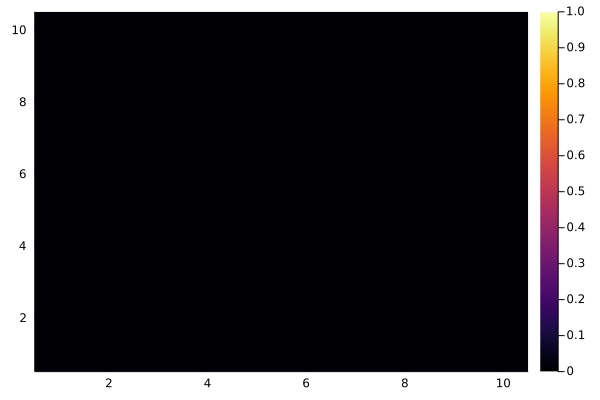

In [4]:
z = sandpile_init(x, y, "zero");
heatmap(1:x, 1:y, z)

Example of a grain being added on previous grid

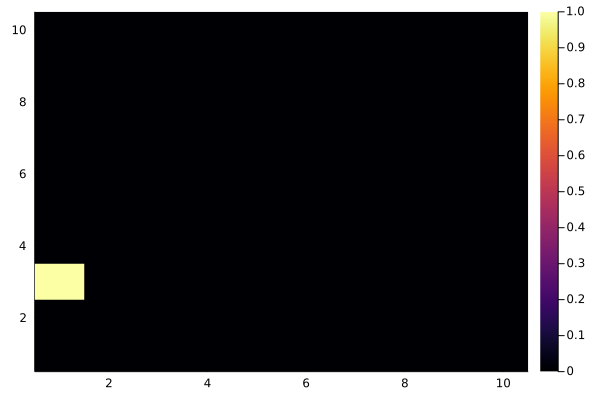

In [5]:
add_grain!(z);
heatmap(1:x, 1:y, z)

`is_unstable()` checks if there are any points greater than the critical value

In [6]:
is_unstable(z)

false

In [7]:
[add_grain!(z) for i in 1:80]
is_unstable(z)

true

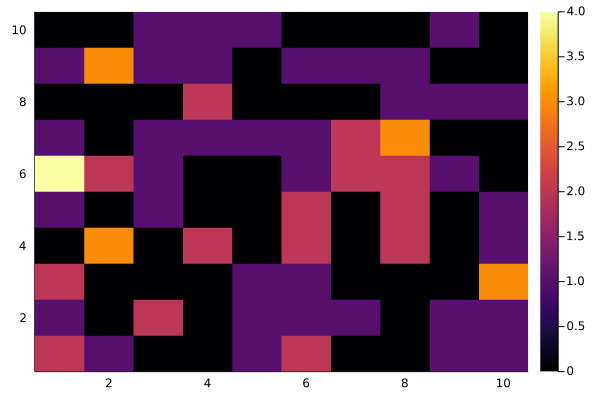

In [8]:
heatmap(1:x, 1:y, z)

Note that after running `avalanche!()`, the highest number of grains is now below the critical value of 4.

In [9]:
avalanche!(z);

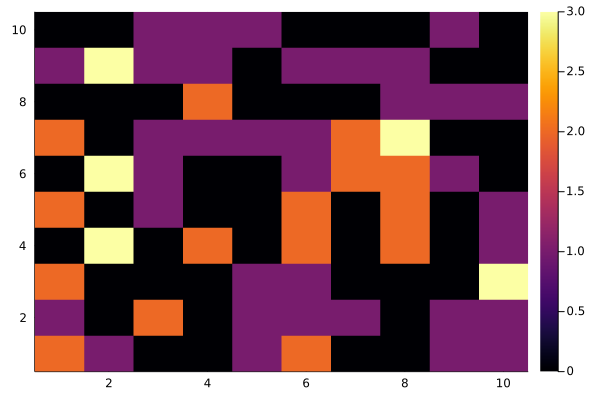

In [10]:
heatmap(1:x, 1:y, z)

## Putting it all together

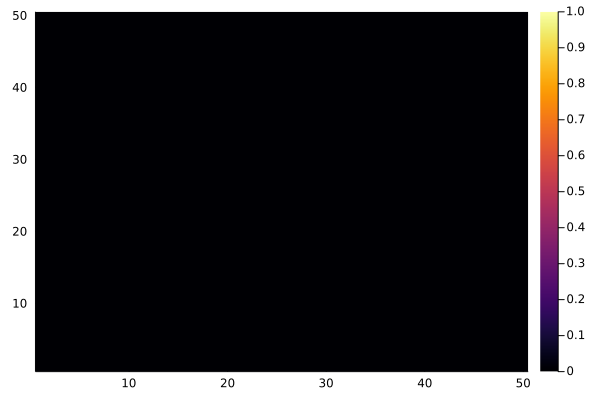

In [11]:
x = 50
y = 50
z = sandpile_init(x, y, "zero");
heatmap(1:x, 1:y, z)

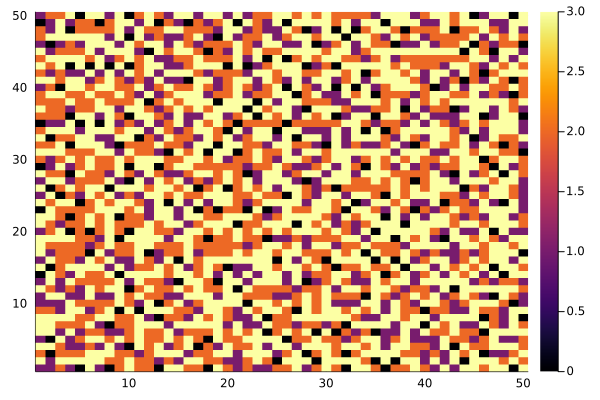

In [12]:
s = run_sandpile!(z, 100_000);
heatmap(1:x, 1:y, z)

## Counting avalanche sizes

Note that sizes of avalanches for each grain added are returned by `run_sandpile`. If the argument `N_crit` is false, it returns a list of all avalanches that occurred ie running the previous cell returns 41687 values after adding 100_000 grains. I added an option of setting `N_crit` = true wherein it will only stop after adding 100_000 (or `N`) grains that all result in at least one avalanche; as expected using this option leads to longer running times.

In [13]:
s'

1×41687 adjoint(::Vector{Int64}) with eltype Int64:
 1  1  1  1  1  1  1  1  1  1  1  1  1  …  39  9  7  35  45  17  453  60  7

We can choose to plot distribution of the cluster sizes below

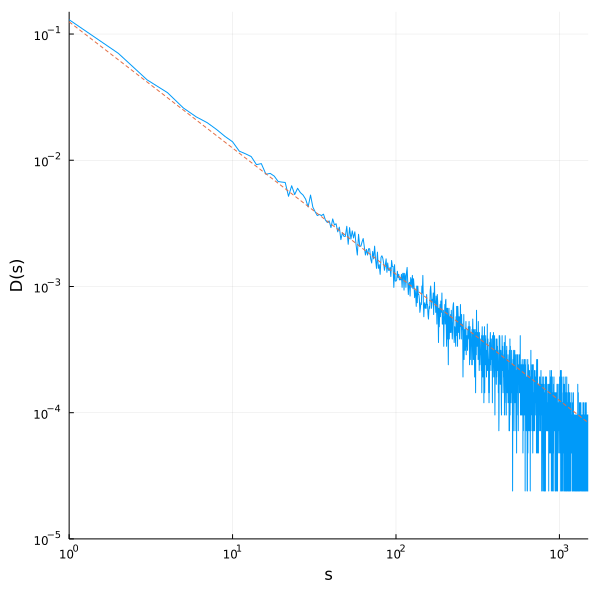

In [14]:
# Get counts of each slide size s
unique_s = sort(unique(reduce(vcat, s)))
counts = [count(==(element), reduce(vcat, s)) for element in unique_s]
yticks = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
xticks = [1e0, 1e1, 1e2, 1e3]
plot(
    unique_s,
    counts ./ sum(counts);
    xaxis=:log,
    yaxis=:log,
    leg=false,
    yticks=yticks,
    xticks=xticks,
    size=(600, 600),
    dpi=300,
)
plot!(
    [1e0, 1e5],
    [1.25e-1, 1.25e-6];
    xaxis=:log,
    yaxis=:log,
    xlabel="s",
    ylabel="D(s)",
    xlim=(1e0, 1.5e3),
    ylim=(1e-5, 1.5e-1),
    linestyle=:dash,
    dpi=300,
)